# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
#choosing Q2 and Q3

In [2]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#importing dataframe
#first downloaded dataset, then uploaded it to the github data file to import, was having issues adding the file directly from the local file path of my computer
sharks = pd.read_excel("/content/wrangling/data/GSAF5.xls")

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [13]:
sharks.shape
#23 columns

(6990, 23)

In [11]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
#dropping pdf, href formula, href, Case Number, Case Number.1 cols[15-19], cannot see all 23 columns at once

In [ ]:
#drop column by index , inplace argument modifies the original, inplace = F: makes a copy of the df, axis = 1 indicates columns, axis =2 indicates rows
#df.drop(df.columns[1], axis =1, inplace = True) or drop by name df.drop(columns = ['col', 'col2'])

In [19]:
#sharks.drop[sharks.columns[15:23], axis=1, inplace = True]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-19-3b00f484ec41>, line 1)

In [38]:
#question 2.2
sharks = sharks.drop(columns=['pdf', 'href', 'href formula', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']) #all had NA values

In [10]:
#sharks.head(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-12-28 00:00:00,2024.0,Unprovoked,Australia,Queensland,Humpy Island Great Keppel Island,Spearfishing,Luke Walford,M,40,...,Unknown,Todd Smith Glen Folkard ABC News: The North We...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-12-02 00:00:00,2024.0,Unprovoked,Australia,Queensland,Curtis Island Near Gladstone QLD central coast,Spearfishing,Not stated,M,60+,...,Not stated,Glen Folkard GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-12-01 00:00:00,2024.0,Unprovoked,Australia,Western Australia,Greenough River Mouth Beach Cape Burney 12km s...,Surfing,James Sweetman (child),M,?,...,1m shark species unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-11-30 00:00:00,2024.0,Unprovoked,Thailand,Phang Nga Province,Khao Lak Beach,Swimming,Elke Maier,F,57,...,Unknown,Kevin McMurray Tracking Sharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-11-19 00:00:00,2024.0,Unprovoked,New Zealand,Bay of Waitangi,Chatham Islands,Diving,Jade Kahukore-Dixon,M,24,...,Great White Shark,Glen Folkhard: Todd Smith: Andy Currie Kevin M...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# 2.3 Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940.
# Are attacks increasing, decreasing, or remaining constant over time?

#drop .0 at the end -- turn from double to integer
#use .astype(int) if no n/a values
#sharks['Year']= pd.to_numeric(sharks['Year'], downcast = 'integer') did not work?
#errors = 'coerce' preserves n/a values
sharks['Year'] = pd.to_numeric(sharks['Year'], errors= 'coerce').astype('Int64')

#.drop used for dropping rows and columns, need x for modifying values inside of a column
#drop .0 at the end of each year
#replace() method refers to text/string data not numeric

#sharks['Year'].describe()
#verifying
sharks['Year'].value_counts()
#vaule_counts() counts unique occurances in table format

#drop max (2026) do not make sense
# use ~ (boolean not operator)
#dropping 2026 values b/c is not a possible data point
sharks = sharks[~sharks['Year'].isin([2026.0])]


#describe range of values
sharks['Year'].describe()
#There are more reports since 1985 (50% of the data is held between 1985 and the present).

#filter rows to be 1940 -present
late_sharks = sharks[sharks['Year'] >= 1940]
len(late_sharks) #5455
#filter rows to be early - 1939
early_sharks = sharks[sharks['Year'] <= 1939]
len(early_sharks) #1402
#find counts of each + compare + describe
#There are 5455 reported sharks attacks since 1940 on this dataset and 1402 (about 20% of the later attacks) before the year 1940. There seems to be a large increase
#in attacks. This could be for a variety of reasons, likely due to the ease of communication and reporting in recent years.

1402

63

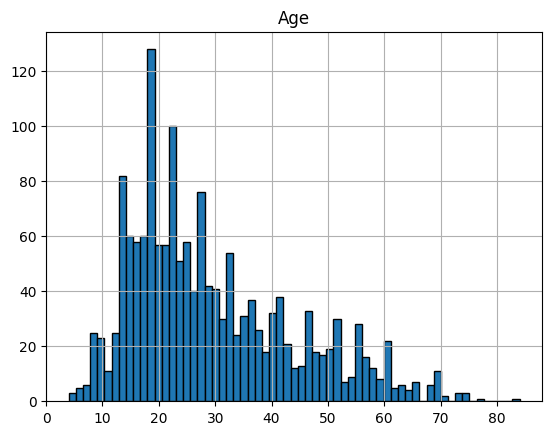

In [83]:
# 2.4 Clean the Age variable and make a histogram of the ages of the victims.

#cleaning age variable
sharks['Age'].describe()
#sharks.head(5)
#drop n/a value for the histogram in the age column by making a copy of the dataframe
#make a copy
sharks_copy = sharks.copy()

#sharks_copy = sharks_copy.dropna(subset= ['Age'])
#drop string values

#regex = False to replace exact patterns ... too many irregular entries
#sharks_copy['Age'] = sharks_copy['Age'].replace(['Teens', '28, 23 & 30', '46 & 34', '30 or 36', 'M', '6 1/2', '33 or 37', '21 & ?', '23 & 20', 'mid-30s', '!2', '20/30', '!!', '7 & 31'], np.nan , regex = False)
#sharks_copy['Age'].describe()

sharks_copy['Age'].value_counts()


#histogram of ages of victims
#ignore n/a values, convert non-numeric values to na
#determine bin count

n = len(sharks_copy['Age'].dropna())
bins = int(np.sqrt(n))

sharks_copy['Age'] = pd.to_numeric(sharks_copy['Age'], errors = 'coerce')

sharks_copy.dropna().hist(bins = bins, column = 'Age', edgecolor='black')



In [91]:
#2.5 What proportion of victims are male?

#male victims/total victims with gender reporting

#male victims
male = sharks[sharks['Sex']=='M']
m = len(male)
#female victims
female = sharks[sharks['Sex']=='F']
f = len(female)

f + m
#proportion
m / (f+ m)


0.8761146496815286

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?